<a href="https://colab.research.google.com/github/SundharessB/Deep-Learning/blob/main/2348564_LAB_Exercise_%E2%80%93_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Perceptron Learning and Gradient Descent Algorithms**

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def initialize_weights():
  return np.random.rand(3)

In [14]:
def generate_inputs(gate):
  if gate == 'AND':
    return np.array([[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
  elif gate == 'OR':
    return np.array([[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
  elif gate == 'NAND':
    return np.array([[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
  elif gate == 'XOR':
    return np.array([[1,0,0],[1,0,1],[1,1,0],[1,1,1]])

In [15]:
def target_outputs(gate):
  if gate == 'AND':
    return np.array([0,0,0,1])
  elif gate == 'OR':
    return np.array([0,1,1,1])
  elif gate == 'NAND':
    return np.array([1,1,1,0])
  elif gate == 'XOR':
    return np.array ([0,1,1,0])

In [16]:
def step(x):
    # if weighted_sum >= 0:
    #     return 1
    # else:
    #     return 0
    return np.where(x >= 0, 1, 0)

In [17]:
def perceptron(input,weights):
  summation = np.dot(input,weights)
  return step(summation)

In [18]:
def perceptron_learning(inputs,targets,weights,learning_rate = 0.1,epochs = 1000):
  errors = []

  for epoch in range(epochs):
    total_error = 0

    for i in range(len(inputs)):
      prediction = perceptron(inputs[i],weights)
      error = targets[i] - prediction # Calculating the error
      weights += learning_rate * error * inputs[i] # Updating the weights
      total_error += np.abs(error)
    errors.append(total_error)

  return weights,errors

In [19]:
def plot_errors(errors):
  plt.plot(range(1,len(errors)+1),errors)
  plt.xlabel('Epochs')
  plt.ylabel('Total Error')
  plt.title("Perceptron Learning Algorithm Convergence")
  plt.show()

In [20]:
def trainTestPerceptron(gate):
  weights = initialize_weights()
  inputs = generate_inputs(gate)
  targets = target_outputs(gate)

  print(f"Training for {gate} gate:")
  print("Initial Weights: ",weights)

  initial_errors = sum(abs(targets-perceptron(inputs,weights)))
  print("Initial Errors: ",initial_errors)

  optimal_weights, errors = perceptron_learning(inputs,targets,weights)
  print("Optimal Weights: ", optimal_weights)

  plot_errors(errors)

  test_errors = sum(abs(targets-perceptron(inputs,optimal_weights)))
  print("Test Errors with Optimal Weights: ",test_errors)

  print("\nPredictions for", gate, "gate:")
  for input_vector in inputs:
      prediction = perceptron(input_vector, optimal_weights)
      print(f"Input: {input_vector[1:]}, Predicted Output: {prediction}")

Training for AND gate:
Initial Weights:  [0.28607845 0.99950885 0.19309224]
Initial Errors:  3
Optimal Weights:  [-0.51392155  0.49950885  0.09309224]


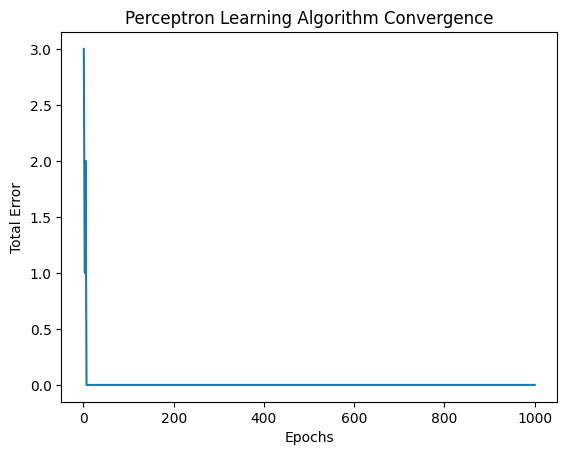

Test Errors with Optimal Weights:  0

Predictions for AND gate:
Input: [0 0], Predicted Output: 0
Input: [0 1], Predicted Output: 0
Input: [1 0], Predicted Output: 0
Input: [1 1], Predicted Output: 1
Training for OR gate:
Initial Weights:  [0.96880481 0.65810425 0.19073483]
Initial Errors:  1
Optimal Weights:  [-0.03119519  0.65810425  0.19073483]


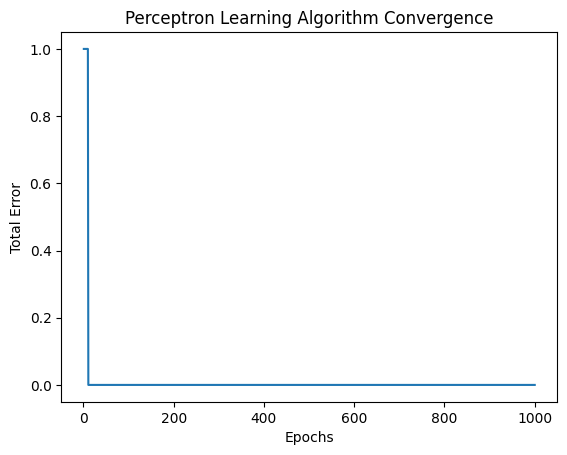

Test Errors with Optimal Weights:  0

Predictions for OR gate:
Input: [0 0], Predicted Output: 0
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 1
Input: [1 1], Predicted Output: 1
Training for NAND gate:
Initial Weights:  [0.76961695 0.05565699 0.60315591]
Initial Errors:  1
Optimal Weights:  [ 0.36961695 -0.34434301 -0.09684409]


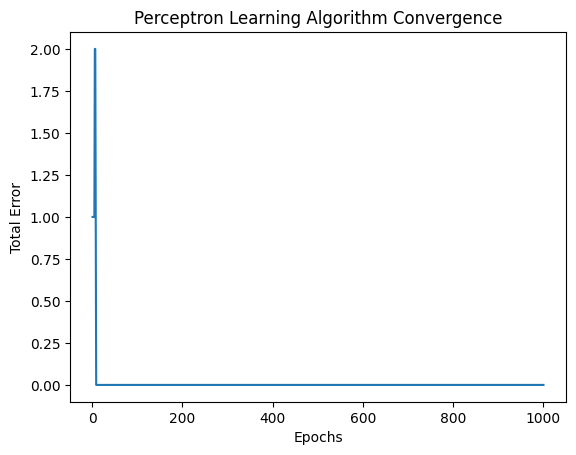

Test Errors with Optimal Weights:  0

Predictions for NAND gate:
Input: [0 0], Predicted Output: 1
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 1
Input: [1 1], Predicted Output: 0
Training for XOR gate:
Initial Weights:  [0.89849289 0.52193635 0.71046987]
Initial Errors:  2
Optimal Weights:  [ 0.09849289 -0.17806365 -0.08953013]


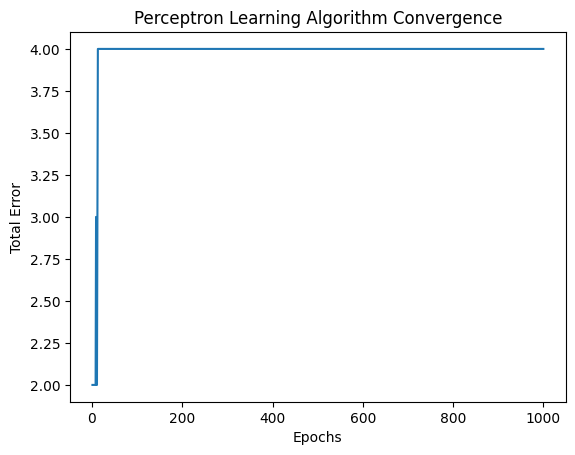

Test Errors with Optimal Weights:  2

Predictions for XOR gate:
Input: [0 0], Predicted Output: 1
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 0
Input: [1 1], Predicted Output: 0


In [21]:
trainTestPerceptron('AND')
trainTestPerceptron('OR')
trainTestPerceptron('NAND')
trainTestPerceptron('XOR')

# **Gradient descent algorithm for a single variable function**

Number of iterations to find the global minima: 33


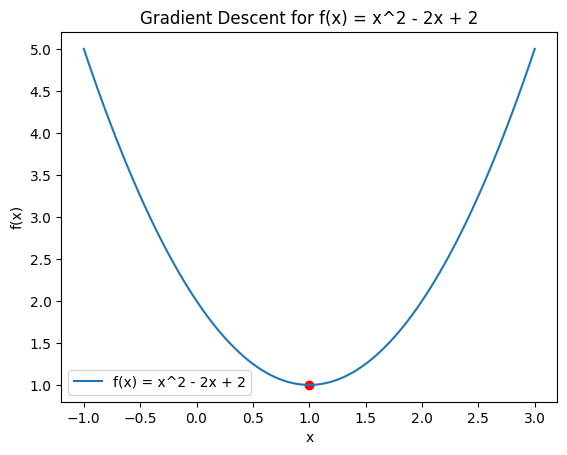

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return x**2 - 2*x + 2

# Define the derivative of the function
def df(x):
    return 2*x - 2

# Gradient Descent Algorithm
def gradient_descent(learning_rate, precision):
    x = np.random.rand()
    iterations = 0
    previous_step_size = 1

    # Loop until convergence
    while previous_step_size > precision:
        prev_x = x
        x = x - learning_rate * df(x)  # Update x
        previous_step_size = abs(x - prev_x)
        iterations += 1

    return x, iterations

# Execute the gradient descent algorithm
learning_rate = 0.1
precision = 0.0001
minima, iterations = gradient_descent(learning_rate, precision)
print("Number of iterations to find the global minima:", iterations)

# Visualize the result
x = np.linspace(-1, 3, 100)
plt.plot(x, f(x), label='f(x) = x^2 - 2x + 2')
plt.scatter(minima, f(minima), color='red')
plt.title('Gradient Descent for f(x) = x^2 - 2x + 2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()


Number of iterations to find the global minima: 2598


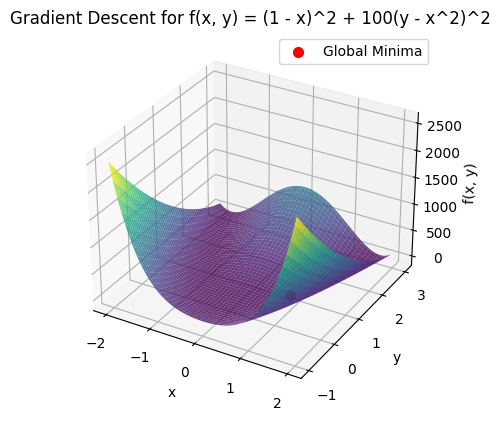

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def f(x, y):
    return (1 - x)**2 + 100*(y - x**2)**2

# Define the partial derivatives of the function
def df_dx(x, y):
    return -2*(1 - x) - 400*x*(y - x**2)

def df_dy(x, y):
    return 200*(y - x**2)

# Gradient Descent Algorithm
def gradient_descent_2d(learning_rate, precision):
    x = np.random.rand()
    y = np.random.rand()
    iterations = 0
    previous_step_size = 1

    # Loop until convergence
    while previous_step_size > precision:
        prev_x = x
        prev_y = y
        x = x - learning_rate * df_dx(prev_x, prev_y)  # Update x
        y = y - learning_rate * df_dy(prev_x, prev_y)  # Update y
        previous_step_size = np.sqrt((x - prev_x)**2 + (y - prev_y)**2)
        iterations += 1

    return x, y, iterations

# Execute the gradient descent algorithm
learning_rate = 0.001
precision = 0.0001
minima_x, minima_y, iterations = gradient_descent_2d(learning_rate, precision)
print("Number of iterations to find the global minima:", iterations)

# Visualize the result
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.scatter(minima_x, minima_y, f(minima_x, minima_y), color='red', s=50, label='Global Minima')
ax.set_title('Gradient Descent for f(x, y) = (1 - x)^2 + 100(y - x^2)^2')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.legend()
plt.show()


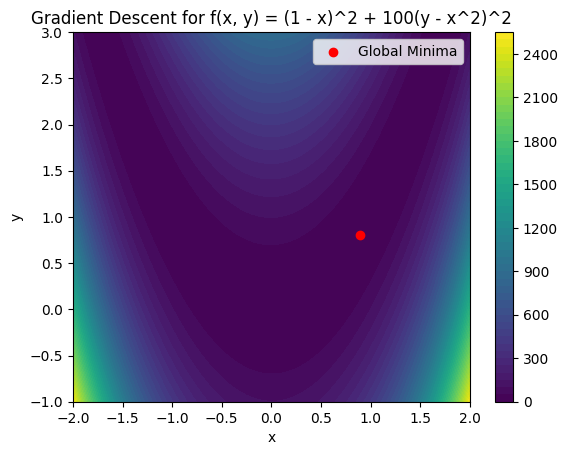

In [24]:
# Visualize the result in a 2D representation (contour plot)
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar()
plt.scatter(minima_x, minima_y, color='red', label='Global Minima')
plt.title('Gradient Descent for f(x, y) = (1 - x)^2 + 100(y - x^2)^2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
